<a href="https://colab.research.google.com/github/JahaanThakkar/Computational-Physics-Assignments/blob/main/Assgn3_Jahaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import pandas as pd
import time

# Problem 1

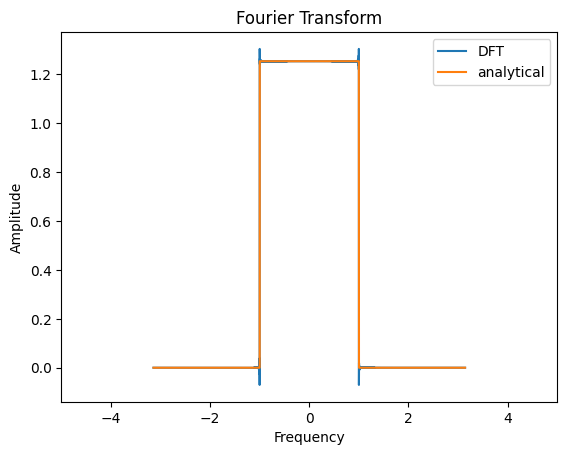

In [ ]:
X = np.linspace(-5000,5000,10001)
n = len(X) - 1
Delta = X[1] - X[0]
signal = np.zeros(len(X))
for i in range(len(X)):
  if X[i] != 0:
    signal[i] = np.sin(X[i])/X[i]
  else:
    signal[i] = 1

dft = np.fft.fftshift(np.fft.fft(signal, norm='ortho'))

frequencies = (2*pi)*np.fft.fftshift(np.fft.fftfreq(len(signal), Delta))

ft = (Delta)*np.sqrt(n/(2*pi))*np.multiply(np.exp(-1j*frequencies*np.min(X)),dft)

aft = sqrt(pi/8)*(np.sign(1-frequencies)+np.sign(1+frequencies))

plt.figure(0)
plt.plot(frequencies, np.real(ft),label="DFT")
plt.plot(frequencies,aft,label="analytical")
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim((-5,5))
plt.legend()
plt.show()

# Problem 2

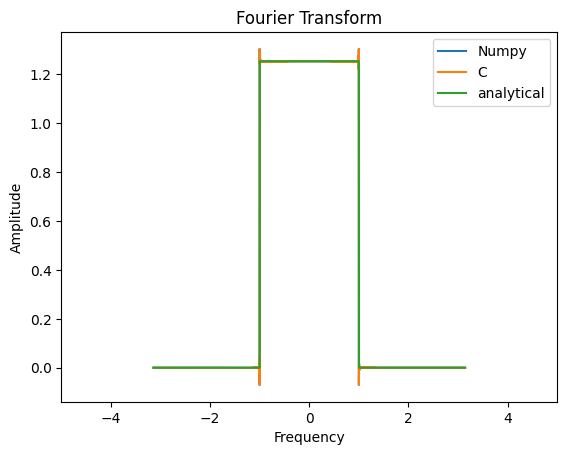

In [112]:
df = pd.read_csv('q2_fft.csv',header=None)
fft= df.to_numpy()
ft2 = np.fft.fftshift(fft[:,0]+1j*fft[:,1])
cft = (Delta)*np.sqrt(n/(2*pi))*np.multiply(np.exp(-1j*frequencies*np.min(X)),ft2)/np.sqrt(n)

plt.figure(0)
plt.plot(frequencies, np.real(ft),label="Numpy")
plt.plot(frequencies, np.real(cft),label="C")
plt.plot(frequencies,aft,label="analytical")
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim((-5,5))
plt.legend()
plt.show()

# Problem 4

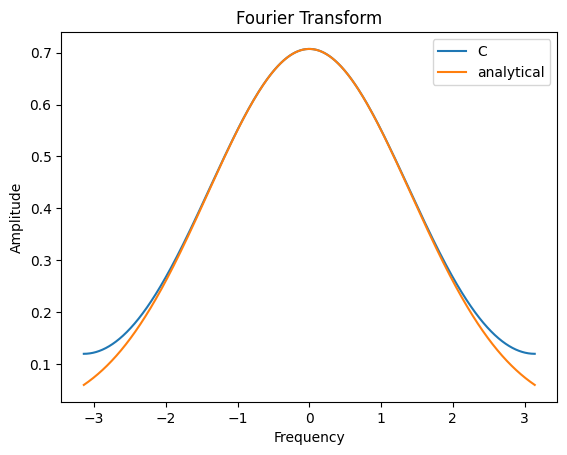

In [114]:
df = pd.read_csv('q4_fft.csv',header=None)
fft= df.to_numpy()
ft2 = np.fft.fftshift(fft[:,0]+1j*fft[:,1])
cft = (Delta)*np.sqrt(n/(2*pi))*np.multiply(np.exp(-1j*frequencies*np.min(X)),ft2)/np.sqrt(n)
aft = np.exp(-frequencies**2/4)/np.sqrt(2)

plt.figure(0)
plt.plot(frequencies, np.real(cft),label="C")
plt.plot(frequencies,aft,label="analytical")
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Problem 5

Time taken without FFT: 0.8911890983581543 while time taken with FFT: 0.00024127960205078125


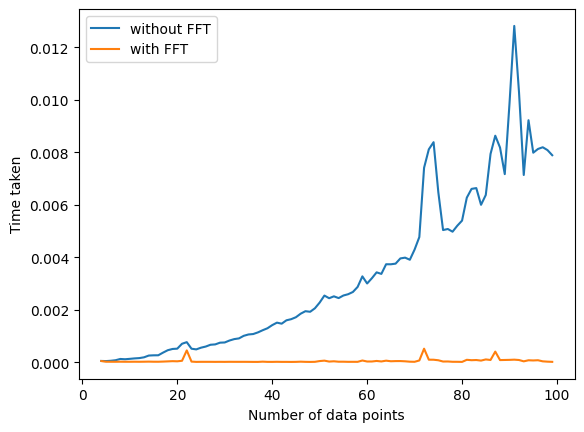

In [ ]:
import random


def dft(signal):
    N = len(signal)
    dft_result = []

    for k in range(N):
        sum_real = 0
        sum_imag = 0
        for n in range(N):
            angle = 2 * pi * k * n / N
            sum_real += signal[n] * cos(angle)
            sum_imag -= signal[n] * sin(angle)
        dft_result.append(complex(sum_real, sum_imag))

    return dft_result

signal = np.random.rand(1000)
st = time.time()
dft_result = dft(signal)
et = time.time()
t1 = et-st
st = time.time()
fft_result = np.fft.fft(signal)
et = time.time()
t2 = et-st

print("Time taken without FFT:",t1,"while time taken with FFT:",t2)

n = np.arange(4,100)
T1 = np.zeros(len(n))
T2 = np.zeros(len(n))

for i in range(len(n)):
  signal = np.random.random(int(n[i]))
  st = time.time()
  dft_result = dft(signal)
  et = time.time()
  t1 = et-st
  st = time.time()
  fft_result = np.fft.fft(signal)
  et = time.time()
  t2 = et-st
  T1[i] = t1
  T2[i]= t2

plt.figure(0)
plt.plot(n,T1,label='without FFT')
plt.plot(n,T2,label='with FFT')
plt.xlabel('Number of data points')
plt.ylabel('Time taken')
plt.legend()
plt.show()

# Problem 6

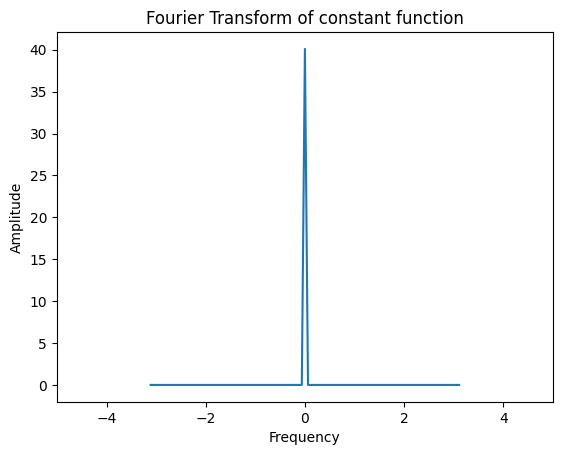

In [ ]:
X = np.linspace(-50,50,101)
n = len(X) - 1
Delta = X[1] - X[0]
signal = np.ones(len(X))

dft = np.fft.fftshift(np.fft.fft(signal, norm='ortho'))

frequencies = (2*pi)*np.fft.fftshift(np.fft.fftfreq(len(signal), Delta))

ft = (Delta)*np.sqrt(n/(2*pi))*np.multiply(np.exp(-1j*frequencies*np.min(X)),dft)

plt.figure(0)
plt.plot(frequencies, np.real(ft))
plt.title('Fourier Transform of constant function')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim((-5,5))
plt.show()

# Problem 10


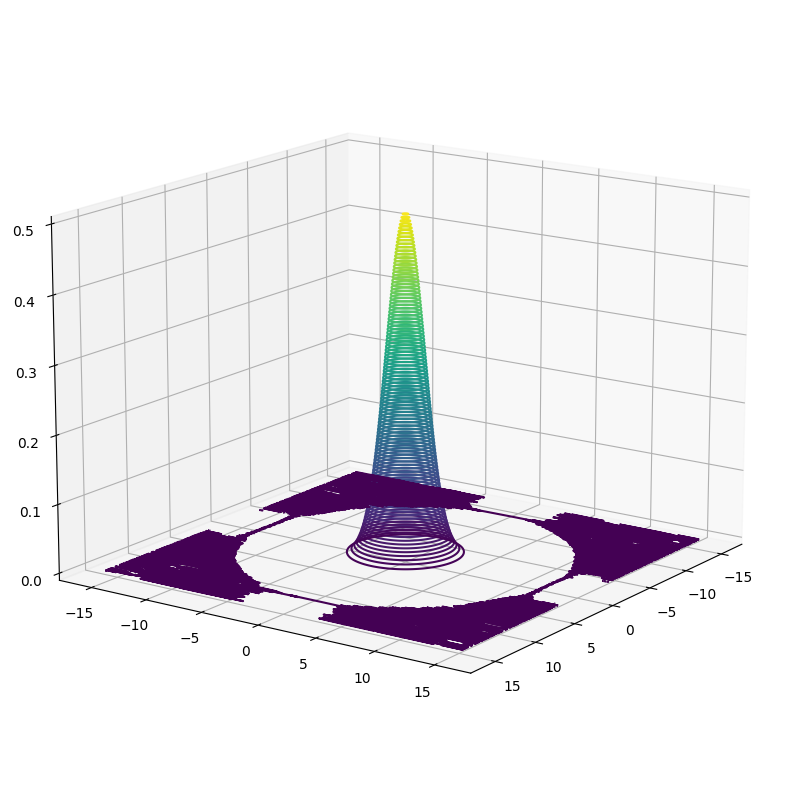

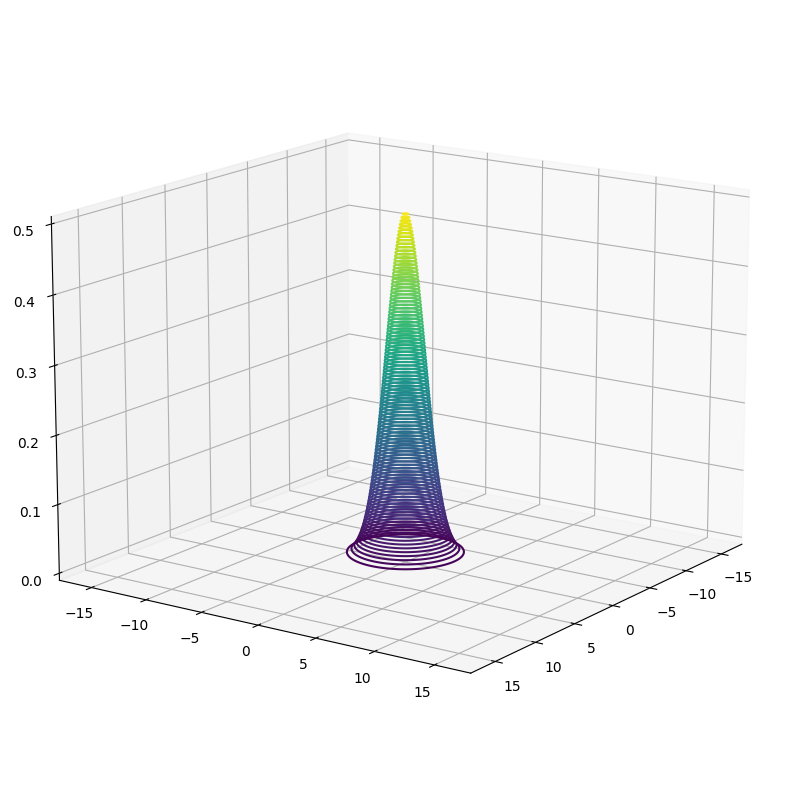

In [ ]:
x = np.linspace(-100, 100, 1001)
fx = 2*pi*np.fft.fftshift(np.fft.fftfreq(len(x),d=x[1]-x[0]))
y = np.linspace(-100, 100, 1001)
fy = 2*pi*np.fft.fftshift(np.fft.fftfreq(len(y),d=y[1]-y[0]))
X, Y = np.meshgrid(x, y)
fX, fY = np.meshgrid(fx, fy)
fZ = 0.5*np.exp(-(fX**2+fY**2)/4)
n = len(x)
Delta = x[1] - x[0]

Z = np.exp(-X**2 - Y**2)

DFT = np.fft.fftshift(np.fft.fft2(Z,norm='ortho'))
FT = (Delta**2)*(n/(2*pi))*np.multiply(np.exp(-1j*(np.add(fX*np.min(x),fY*np.min(y)))),DFT)

fig1 = plt.figure(figsize=(10,10))
ax1 = plt.axes(projection='3d')
ax1.contour3D(fX, fY, np.real(FT),100)
ax1.view_init(15, 35)
plt.show()

fig2 = plt.figure(figsize=(10,10))
ax2 = plt.axes(projection='3d')
ax2.contour3D(fX, fY, fZ, 100)
ax2.view_init(15, 35)
plt.show()

# Problem 11

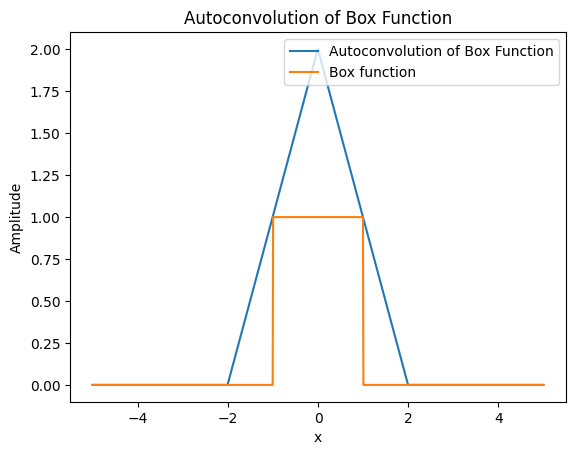

In [ ]:
def box_function(x):
    return np.where(np.abs(x) <= 1, 1, 0)

def autoconvolution_box_function(x):
    box_fft = np.fft.fft(box_function(x))

    Delta = x[1] - x[0]

    autoconvolution_fft = box_fft**2

    autoconvolution = Delta*np.fft.fftshift(np.fft.ifft(autoconvolution_fft))

    return autoconvolution

x = np.linspace(-5, 5, 1000)

plt.figure(0)
plt.plot(x, np.real(autoconvolution_box_function(x)), label='Autoconvolution of Box Function')
plt.plot(x, box_function(x), label='Box function')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Autoconvolution of Box Function')
plt.legend()
plt.show()

# Problem 12

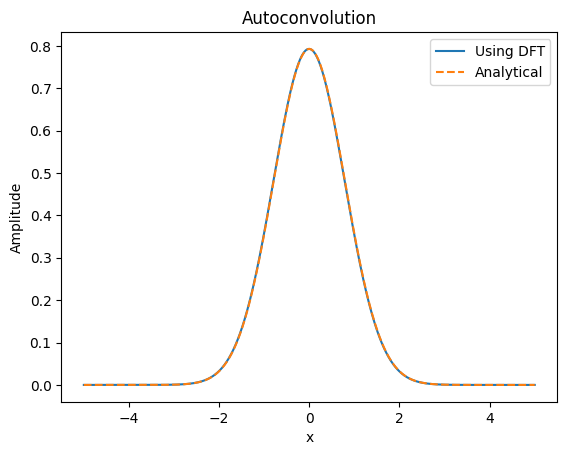

In [ ]:
def g(x):
    return np.exp(-x**2)

def h(x):
    return np.exp(-4*x**2)

def autoconvolution_function(x):
    g_fft = np.fft.fft(g(x))
    h_fft = np.fft.fft(h(x))

    Delta = x[1] - x[0]

    autoconvolution_fft = g_fft*h_fft

    autoconvolution = Delta*np.fft.fftshift(np.fft.ifft(autoconvolution_fft))

    return autoconvolution

x = np.linspace(-5, 5, 1000)

plt.figure(0)
plt.plot(x, np.real(autoconvolution_function(x)), label='Using DFT')
plt.plot(x, sqrt(pi/5)*np.exp(-4*x**2/5),'--', label='Analytical')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Autoconvolution')
plt.legend()
plt.show()

# Problem 13

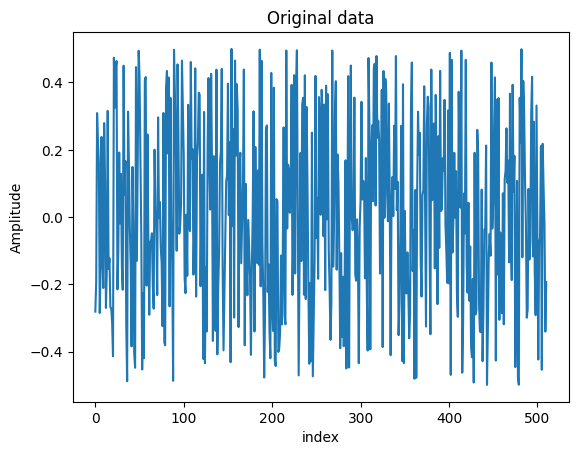

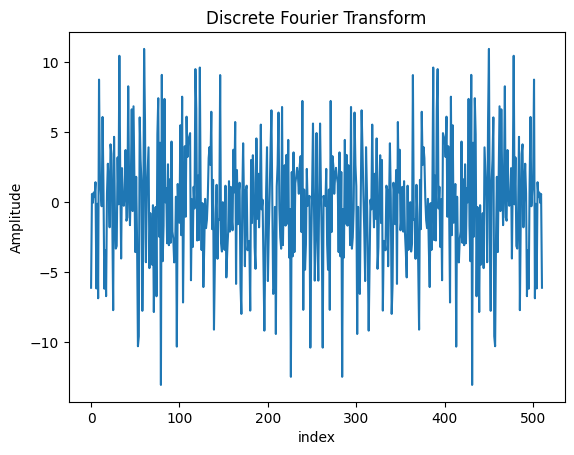

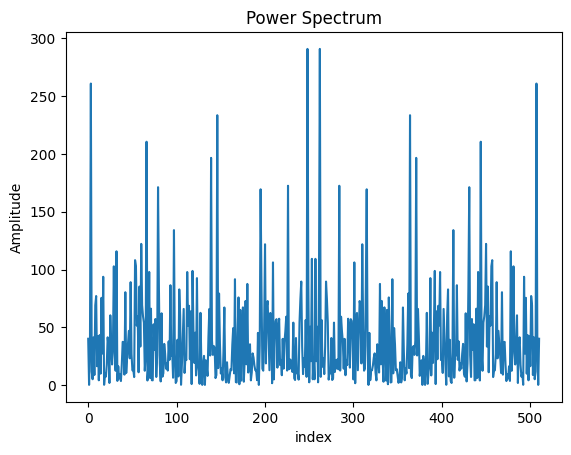

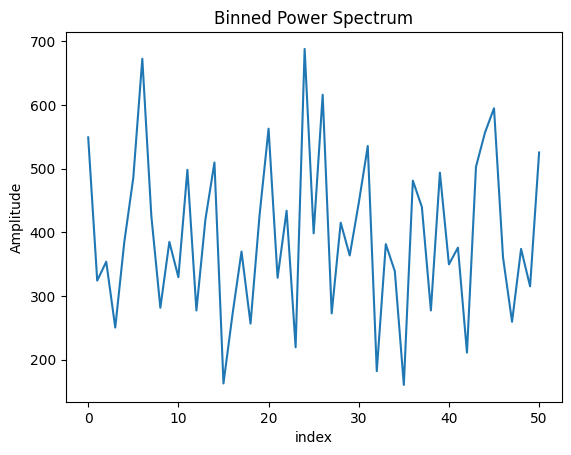

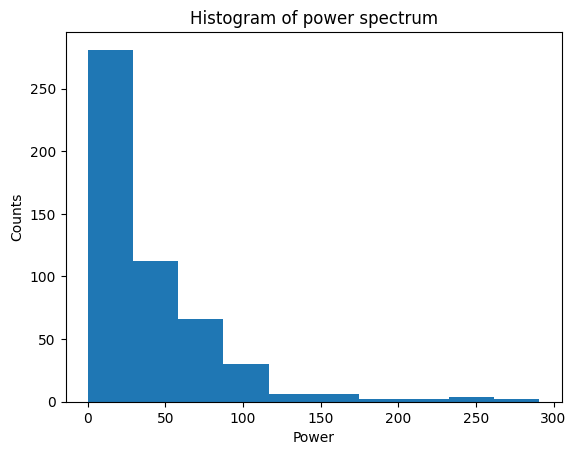

In [ ]:
df = pd.read_csv('q13_data.csv')
signal = df.iloc[:,0]
dft = np.fft.fftshift(np.fft.fft(signal))
pow = np.abs(dft)**2
bpow = [np.sum(pow[10*i:10*(i+1)]) for i in range(51)]

plt.figure(0)
plt.plot(np.arange(len(signal)), signal)
plt.title('Original data')
plt.xlabel('index')
plt.ylabel('Amplitude')
plt.show()

plt.figure(1)
plt.plot(np.arange(len(dft)), np.real(dft))
plt.title('Discrete Fourier Transform')
plt.xlabel('index')
plt.ylabel('Amplitude')
plt.show()

plt.figure(2)
plt.plot(np.arange(len(pow)), pow)
plt.title('Power Spectrum')
plt.xlabel('index')
plt.ylabel('Amplitude')
plt.show()

plt.figure(3)
plt.plot(np.arange(len(bpow)), bpow)
plt.title('Binned Power Spectrum')
plt.xlabel('index')
plt.ylabel('Amplitude')
plt.show()

plt.figure(4)
plt.hist(pow,bins=10)
plt.title('Histogram of power spectrum')
plt.xlabel('Power')
plt.ylabel('Counts')
plt.show()